# Author - Aditya Singh Kashyap

## GRIPAPRIL21

## Task2: Prediction using Unsupervised ML



### Importing all relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### Importing Dataset

In [2]:
url = "C:\\Users\\dell\\Desktop\\Iris.csv"
s_data = pd.read_csv(url)

s_data.head(150)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
s_data.shape

(150, 6)

In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
s_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Determining the optimum number of clusters using Elbow method

In [6]:
x = s_data.iloc[:,0:3].values

WCSS = list()

for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
Number_of_Clusters = list(range(1,6))
WCSS

[281367.6809333334,
 70389.00533333335,
 31293.491200000015,
 17647.82154338549,
 11322.353705598813]

<function matplotlib.pyplot.show(close=None, block=None)>

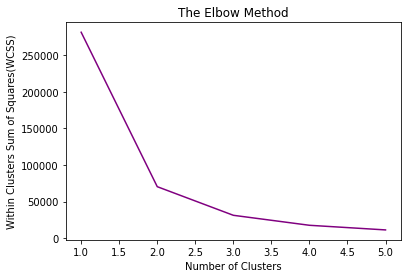

In [7]:
plt.plot( Number_of_Clusters, WCSS, c="Purple")
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(WCSS)')
plt.title("The Elbow Method")
plt.show

#### The optimum no. of clusters are 3

### Describing Clusters

In [8]:
x = pd.DataFrame(s_data.iloc[:,0:2])
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
Clusters = kmeans.fit_predict(x)
x ['Clusters'] = Clusters
x

,Id,SepalLengthCm,Clusters
0,1,5.1,1
1,2,4.9,1
2,3,4.7,1
3,4,4.6,1
4,5,5.0,1
...,...,...,...
145,146,6.7,2
146,147,6.3,2
147,148,6.5,2
148,149,6.2,2


### Visualizing the Clusters

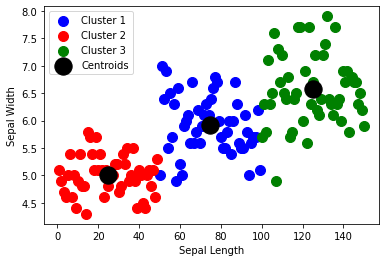

In [9]:
D1= x[x['Clusters'] ==0 ]
plt.scatter(D1.iloc[:, 0], D1.iloc[:,1],s=100,  c='blue', label ='Cluster 1')
D2= x[x['Clusters'] ==1 ]
plt.scatter(D2.iloc[:, 0], D2.iloc[:,1], s=100, c='red', label ='Cluster 2')
D3= x[x['Clusters'] ==2 ]
plt.scatter(D3.iloc[:, 0], D3.iloc[:,1], s=100, c='green', label ='Cluster 3')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 300, c = 'k', label = 'Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()